In [4]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data (1).csv


In [7]:
import pandas as pd

# Replace with your exact filenames if different
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")


In [8]:
trader_df.head()     # First 5 rows of trader data
sentiment_df.head()  # First 5 rows of sentiment data


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [14]:
# Convert 'Timestamp IST' to datetime (format: dd-mm-yyyy HH:MM)
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Create a date-only column for merging later
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date


In [15]:
# Convert 'date' to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Create a date-only column for merging
sentiment_df['date_only'] = sentiment_df['date'].dt.date


In [16]:
# Remove commas, convert to numeric if needed
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')


In [17]:
# Check for nulls
print(trader_df[['Closed PnL', 'Size USD']].isnull().sum())


Closed PnL    0
Size USD      0
dtype: int64


In [18]:
# Merge on 'date_only' to get market sentiment per trade
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'classification']],  # Keep only needed columns
    on='date_only',
    how='left'
)


In [19]:
# Preview merged data
merged_df[['Account', 'Timestamp IST', 'Closed PnL', 'Size USD', 'classification']].head()


,Account,Timestamp IST,Closed PnL,Size USD,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,7872.16,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,127.68,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,1150.63,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,1142.04,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,69.75,Extreme Greed


In [20]:
import os
os.makedirs("outputs", exist_ok=True)


/tmp/ipython-input-21-2132005214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='coolwarm')


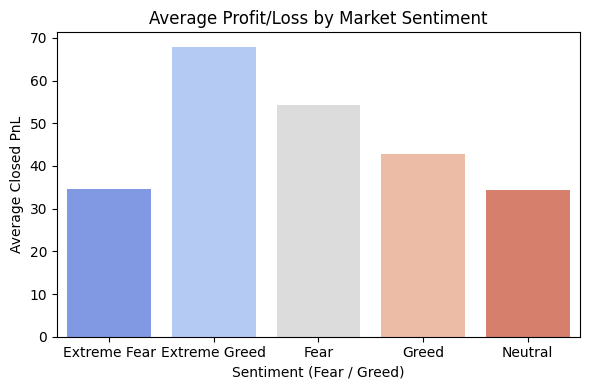

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by sentiment and get average PnL
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='coolwarm')
plt.title("Average Profit/Loss by Market Sentiment")
plt.xlabel("Sentiment (Fear / Greed)")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()


/tmp/ipython-input-22-2468806936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trade_counts, x='Sentiment', y='Number of Trades', palette='Set2')


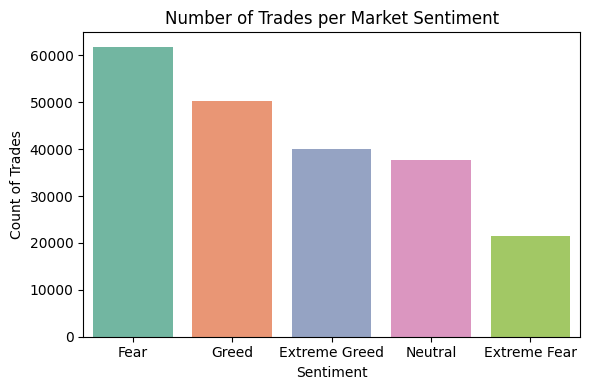

In [22]:
trade_counts = merged_df['classification'].value_counts().reset_index()
trade_counts.columns = ['Sentiment', 'Number of Trades']

plt.figure(figsize=(6,4))
sns.barplot(data=trade_counts, x='Sentiment', y='Number of Trades', palette='Set2')
plt.title("Number of Trades per Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count of Trades")
plt.tight_layout()
plt.savefig("outputs/trade_counts_by_sentiment.png")
plt.show()


/tmp/ipython-input-23-3400058673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_size, x='classification', y='Size USD', palette='viridis')


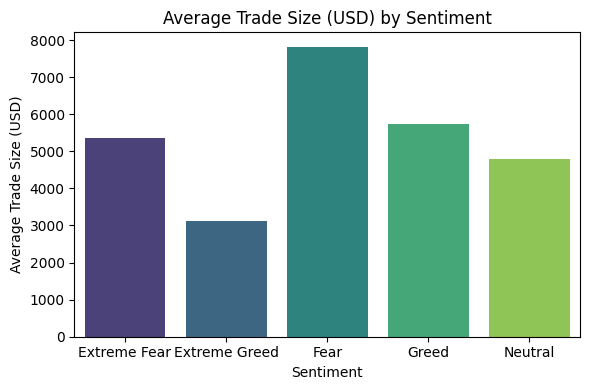

In [23]:
avg_size = merged_df.groupby('classification')['Size USD'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_size, x='classification', y='Size USD', palette='viridis')
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.tight_layout()
plt.savefig("outputs/avg_trade_size_by_sentiment.png")
plt.show()
